# Model Training

### 1.1 Import Data and Required Packages



In [2]:
!pip install catboost

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 641.3 kB/s eta 0:02:39
   ---------------------------------------- 0.5/102.4 MB 641.3 kB/s eta 0:02:39
   ---------------------------------------- 0.8/102.4 MB 586.9 kB/s eta 0:02:54
   ---------------------------------------- 1.0/102.4 MB 766.0 kB/s eta 0:02:13
    --------------------------------------- 1.6/102.4 MB 1.0 MB/s eta 0:01:41
    --------------------------------------- 1.8/102.4 MB 1.1 MB/s eta 0:01:34
   - ---------------------------

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


# Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

C:\Users\Ajay\AppData\Roaming\Python\Python313\site-packages\xgboost\compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Independent Feature

x = df.drop(columns=['math_score'],axis=1)

In [8]:
# Dependent Feature

y = df['math_score']

In [11]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categorical in 'parental_level_of_education'",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course'",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethinicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental_level_of_education' ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' ['none' 'completed']


In [12]:
# Create column Transformer with 3 types of transformers

num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScater",numeric_transformer,num_features),
    ]
)

In [18]:
# Separate dataset into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [19]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Trainig

In [20]:
def evalute_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [24]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoosting regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []


for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train model

    # Make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evalute_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2 = evalute_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("- R2 Score:{:.4f}".format(model_train_r2))

    print('-------------------------------------------')

    print('Model performance for Test set')
    print("- Root mean squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("- R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



    


Linear Regression
Model performance for Training set
- Root Mean Squared Error:5.3231
- Mean Absolute Error:4.2667
- R2 Score:0.8743
-------------------------------------------
Model performance for Test set
- Root mean squared Error:5.3940
- Mean Absolute Error:4.2148
- R2 Score:0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error:6.5938
- Mean Absolute Error:5.2063
- R2 Score:0.8071
-------------------------------------------
Model performance for Test set
- Root mean squared Error:6.5197
- Mean Absolute Error:5.1579
- R2 Score:0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error:5.3233
- Mean Absolute Error:4.2650
- R2 Score:0.8743
-------------------------------------------
Model performance for Test set
- Root mean squared Error:5.3904
- Mean Absolute Error:4.2111
- R2 Score:0.8806


K-Neighbours Regressor
Model performance for Training set
- Root Mean Squared Error:5.7077
- Mean Absolute Error:4.5167
- R2 Score:0.8555
----------------

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.856599
8,AdaBoost Regressor,0.851657
7,CatBoosting regressor,0.851632
1,Lasso,0.825320
6,XGBoost,0.821589
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.740546


# Linear Regression


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

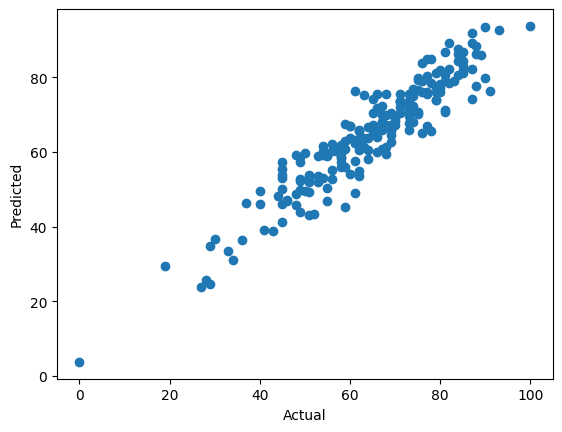

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Difference between Actual and Predicted Values

In [28]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})

pred_df

,Actual value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
